In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Combine edge detection histogram with statistics

In [ ]:

import os
import cv2
import numpy as np
import pandas as pd
from skimage.filters import sobel
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [ ]:
my_arrays_final = np.load("/content/drive/MyDrive/numpy_data.npz", allow_pickle=True)


In [ ]:

X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [ ]:

X_train = X_train.reshape(X_train.shape[0],100,100)
X_test = X_test.reshape(X_test.shape[0],100,100)

In [ ]:

X_com = np.vstack([X_train, X_test])
y_com = np.hstack([y_train, y_test])

In [ ]:
def feature_extractor(dataset):
  image_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img = dataset[image, :,:]/255
      #hist,bins = np.histogram(img.ravel(),256,[0,256])
      hist,bins = np.histogram(img.ravel(),64)
      df= pd.DataFrame(hist)
      df=df.transpose()
      image_dataset= pd.concat([image_dataset, df], ignore_index=True)   
      
  return image_dataset

In [ ]:
OG_image = feature_extractor(X_com)

columnnames1 = {}
count1 = 0
for i in OG_image.columns:
  count1 += 1
  columnnames1[i] = f"Pix_{count1}"
OG_image.rename(columns = columnnames1 ,inplace = True)

In [ ]:
from skimage.filters import prewitt


In [ ]:
def edge_filter(dataset):
  edge_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_edge = dataset[image, :,:]/255
      fd = prewitt(img_edge)
      hist1,bins = np.histogram(fd.ravel(),64)
      df1= pd.DataFrame(hist1)
      df1=df1.transpose()
      edge_dataset= pd.concat([edge_dataset, df1], ignore_index=True)   
      
  return edge_dataset

In [ ]:
edge_filter_df = edge_filter(X_com)

columnnames = {}
count = 0
for i in edge_filter_df.columns:
  count += 1
  columnnames[i] = f"Pix_edge{count}"
edge_filter_df.rename(columns = columnnames ,inplace = True)
     
frame = [OG_image, edge_filter_df]

combined_df = pd.concat(frame, axis=1)

y_data = pd.DataFrame({'label': y_com})

final_df = pd.concat([combined_df, y_data], axis=1)


In [ ]:
df_stats = pd.read_csv ('/content/drive/MyDrive/data_X_for_ML_all_data.csv')

In [ ]:
df_stats = df_stats[['sum_Roberts', '25%_sato', 'TOM', 'mean_Entropy', 'std_Gaussian s4']]

In [ ]:
stats = pd.concat([combined_df, df_stats], axis=1)

In [ ]:
final_stats = pd.concat([stats, y_data], axis=1)

In [ ]:
final_stats

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_edge59,Pix_edge60,Pix_edge61,Pix_edge62,Pix_edge63,Pix_edge64,sum_Roberts,25%_sato,TOM,label
0,96,148,112,121,103,122,106,102,92,106,...,3,0,0,1,0,2,0.015049,0.000705,177,2.0
1,3,2,37,94,101,182,228,331,235,306,...,0,0,0,1,0,1,0.012138,0.000790,183,2.0
2,20,25,14,30,65,103,132,100,97,184,...,2,2,2,4,4,5,0.006918,0.000434,50,0.0
3,3,5,9,35,81,84,57,77,62,79,...,1,0,0,1,0,1,0.006513,0.000422,76,0.0
4,7,25,223,502,472,645,674,583,258,219,...,0,1,2,0,0,2,0.006980,0.000373,71,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,6,18,91,154,184,338,413,455,407,271,...,0,2,0,0,1,3,0.012653,0.000677,126,2.0
7559,55,30,56,171,197,189,174,199,189,210,...,2,5,4,2,0,3,0.015978,0.000811,183,0.0
7560,4,1,2,4,7,13,46,114,234,248,...,6,4,4,1,4,3,0.007360,0.000473,38,0.0
7561,60,133,192,193,164,159,136,116,159,218,...,2,1,0,0,1,1,0.009028,0.000465,124,2.0


In [ ]:
final_stats = final_stats[(final_stats.index % 2== 0 )]

In [ ]:
final_stats

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_edge61,Pix_edge62,Pix_edge63,Pix_edge64,sum_Roberts,25%_sato,TOM,mean_Entropy,std_Gaussian s4,label
0,96,148,112,121,103,122,106,102,92,106,...,0,1,0,2,0.015049,0.000705,177,0.897670,1.590439,2.0
2,20,25,14,30,65,103,132,100,97,184,...,2,4,4,5,0.006918,0.000434,50,0.499315,1.414592,0.0
4,7,25,223,502,472,645,674,583,258,219,...,2,0,0,2,0.006980,0.000373,71,0.503976,1.980940,1.0
6,2,14,102,291,305,287,396,351,297,311,...,2,0,0,3,0.008584,0.000704,85,0.592070,2.077118,2.0
8,75,77,53,82,139,128,147,116,218,217,...,0,0,1,1,0.006651,0.000598,89,0.460119,1.304329,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,24,46,36,86,210,336,373,512,486,104,...,10,8,4,2,0.006925,0.000269,16,0.348457,1.736865,0.0
7556,48,60,22,22,21,13,9,10,19,27,...,0,0,2,3,0.007017,0.000492,131,0.540168,1.456438,0.0
7558,6,18,91,154,184,338,413,455,407,271,...,0,0,1,3,0.012653,0.000677,126,0.843416,1.800719,2.0
7560,4,1,2,4,7,13,46,114,234,248,...,4,1,4,3,0.007360,0.000473,38,0.457225,1.826801,0.0


In [ ]:
X = final_stats.iloc[:, 0:-1]
y = final_stats.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
embedding_tsne = TSNE(n_components=2)
X_train_tnse = embedding_tsne.fit_transform(X_train)

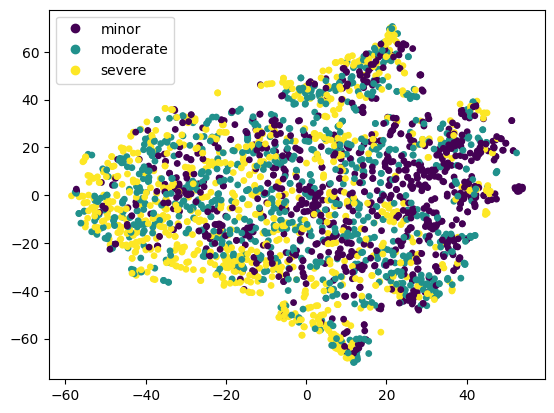

In [ ]:
labels = ['minor', 'moderate', 'severe']
plot = plt.scatter(X_train_tnse[:,0], X_train_tnse[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

In [ ]:
#pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=184a37241c945b67f731a21ec2da773272725ad7949023f570345c666bd0450e
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=17f20c10b151bbc77f7dd1418058c7060f85d8ec692c64158d05083af00b14ba
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap


In [ ]:

umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)

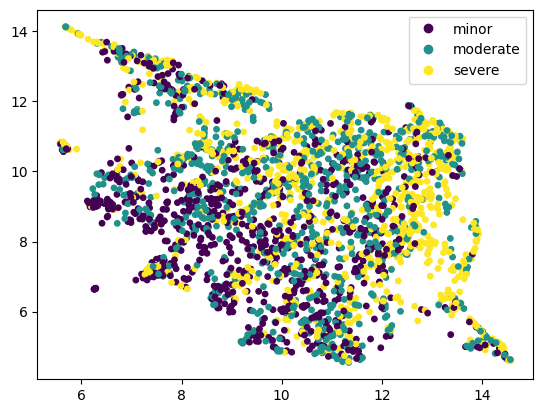

In [ ]:
plot = plt.scatter(umap_f[:,0], umap_f[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

In [ ]:
umap_test_set = umap_test.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
rf1=RandomForestClassifier(criterion= 'entropy', max_depth= 4, max_features=None, min_samples_split=2, min_samples_leaf=2)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Testing
Accuracy for Random Forest:  0.5330396475770925
Classification Report
               precision    recall  f1-score   support

         0.0       0.58      0.65      0.61       359
         1.0       0.47      0.31      0.37       396
         2.0       0.53      0.66      0.58       380

    accuracy                           0.53      1135
   macro avg       0.53      0.54      0.52      1135
weighted avg       0.52      0.53      0.52      1135

Training
Accuracy for Random Forest:  0.6021911598035512
Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.70      0.66       869
         1.0       0.55      0.36      0.43       871
         2.0       0.61      0.74      0.67       907

    accuracy                           0.60      2647
   macro avg       0.59      0.60      0.59      2647
weighted avg       0.59      0.60      0.59      2647



In [ ]:
param_grid = { 
    'max_depth' : range(1,4),
    'criterion' :['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split':[2,3],
    'min_samples_leaf': [1, 2],
    'n_estimators': [100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 4),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]})

In [ ]:
cv_rf.best_params_


{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf1=RandomForestClassifier(criterion= 'entropy', max_depth= 3, max_features=None, min_samples_split=2, min_samples_leaf=1, n_estimators=100)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Testing
Accuracy for Random Forest:  0.5180616740088105
Classification Report
               precision    recall  f1-score   support

         0.0       0.57      0.67      0.62       359
         1.0       0.44      0.25      0.32       396
         2.0       0.51      0.66      0.57       380

    accuracy                           0.52      1135
   macro avg       0.51      0.52      0.50      1135
weighted avg       0.50      0.52      0.50      1135

Training
Accuracy for Random Forest:  0.5602568945976577
Classification Report
               precision    recall  f1-score   support

         0.0       0.59      0.69      0.63       869
         1.0       0.46      0.26      0.33       871
         2.0       0.58      0.72      0.64       907

    accuracy                           0.56      2647
   macro avg       0.54      0.56      0.54      2647
weighted avg       0.54      0.56      0.54      2647

